# 03. MLP, Multi-Layer Perceptron — 從數學到 PyTorch

## 0. Notebook Header
- 作者：Paul Yang
- 目的：理解神經網路如何解決非線性問題 (XOR)，並掌握反向傳播 (Backpropagation) 的精隨。
- 學會什麼：Hidden Layer, Activation Function, Chain Rule, PyTorch nn.Sequential

## 1. 為什麼需要神經網路？(The XOR Problem)
我們之前學的 Linear/Logistic Regression 只能畫「一條直線」來分類。
但是，如果資料長得像 **XOR (互斥或)** 這樣，一條線是切不開的：
- (0, 0) -> 0
- (1, 1) -> 0
- (0, 1) -> 1
- (1, 0) -> 1

我們需要「彎曲」的線，這就是 **Hidden Layer (隱藏層)** 和 **Non-linear Activation (非線性激活函數)** 的工作。

X Shape: (4, 2)
y Shape: (4, 1)


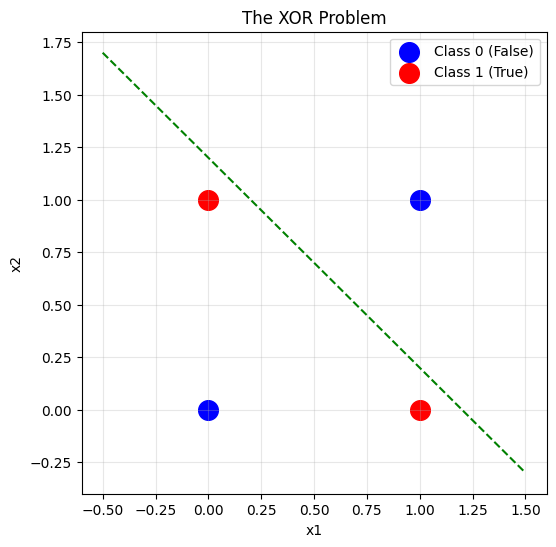

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 準備 XOR 資料
# 輸入 X: 4個點
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 標籤 Y: XOR 的結果 (0, 1, 1, 0)
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

fig, ax = plt.subplots(figsize=(6, 6))
# 2. 視覺化 XOR 問題

# 畫出 label 為 0 的點 (藍色)
ax.scatter(X[y.flatten()==0][:, 0], X[y.flatten()==0][:, 1], 
           color='blue', s=200, label='Class 0 (False)')

# 畫出 label 為 1 的點 (紅色)
ax.scatter(X[y.flatten()==1][:, 0], X[y.flatten()==1][:, 1], 
           color='red', s=200, label='Class 1 (True)')

ax.set_title("The XOR Problem")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.grid(True, alpha=0.3)

# 嘗試畫一條線看看能不能分開？(示意圖)
x_line = np.linspace(-0.5, 1.5, 100)
ax.plot(x_line, -x_line + 1.2, 'g--', label='Any Linear Line?') 

plt.show()

## 2.激活函數

### a. 純Python

In [4]:
import math

def step_function(x):
    return 1 if x>= 0 else 0

def relu(x):
    return max(0, x)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

print(f"Step(0.5) = {step_function(0.5)}")   # 應該是 1
print(f"Step(-2) = {step_function(-2)}")     # 應該是 0
print(f"ReLU(3) = {relu(3)}")                 # 應該是 3
print(f"ReLU(-1) = {relu(-1)}")               # 應該是 0
print(f"Sigmoid(5) = {sigmoid(5)}")          # 應該接近 1
print(f"Sigmoid(-5) = {sigmoid(-5)}")        # 應該接近 0
print(f"Sigmoid(0) = {sigmoid(0)}")          # 應該是 0.5

Step(0.5) = 1
Step(-2) = 0
ReLU(3) = 3
ReLU(-1) = 0
Sigmoid(5) = 0.9933071490757153
Sigmoid(-5) = 0.0066928509242848554
Sigmoid(0) = 0.5


### b. Numpy
為了讓這些數學公式能同時處理一整批資料

In [5]:
import numpy as np

def sigmoid_np(x):
    return 1 / (1 + np.exp(-x)) 

## 初始化

In [6]:
import numpy as np
import matplotlib.pyplot as plt

w1 = np.random.randn(2, 2)  # 2 inputs, 2 neurons
b1 = np.random.randn(2)     # 2 neurons

w2 = np.random.randn(2, 1)  # 2 inputs, 1 output
b2 = np.random.randn(1)     # 1 output

In [7]:
def forward(X):
    z1 = np.dot(X, w1) + b1      # 第一層的線性組合
    a1 = sigmoid_np(z1)          # 第一層的激活函數
    z2 = np.dot(a1, w2) + b2      # 第二層的線性組合
    a2 = sigmoid_np(z2)          # 第二層的激活函數
    return a2

In [8]:
forward(X)

array([[0.14797738],
       [0.12154009],
       [0.19836484],
       [0.16710255]])